In [1]:
import scipy.stats as st

# A/B Testing - Lab

## Introduction

In this lab, you'll go through a sample process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate, which has outperformed numerous other templates in the past. As a result of some very poor performance from some of these alternative templates, the company is both excited to test this new design that was developed internally, and nervous about losing sales, if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template to in order to detect a 1% performance increase (or drop).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

h_0 : New template does not change response rate.

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

h_1 : New email template is >= 1% different responce rate; implying a two-tailed test is called for.

## Step 3: Define Alpha and Beta

Now define what alpha and beta you believe might be appropriate for this scenario.
To start, we may arbitrarily set alpha and beta to .01, indicating that we wish to minimally open ourselves up to type I and type II errors. Later, we will be able to adapt these, if sample sizes turn out to be impractically large.

In [2]:
alpha = .01
beta = .01

## Step 4: Calculate N

Calculating n requires us to know the variance. In this case, we will have a binomial variable (they either respond to the email or don't) and thus the variance, can be calculated with a standard formula: $n\bullet p\bullet(1-p)$ however, this also requires knowledge of p, the probability of response from the updated template. After conducting a limited sample however, we can extrapolate more and detemine if we have sufficient evidence or not.


...So, after an initial trial of 35 individuals, you have a total of 2 responses. 

Is this sufficient evidence to refute the null hypothesis stated above?

In [154]:
#Your code for testing the null hypothesis here    
def compute_n(alpha, beta, mu_0, mu_1, var):
    z_alpha = st.norm.ppf(alpha)
    z_beta = st.norm.ppf(beta)
    num = ((z_alpha+z_beta)**2)*var
    den = (mu_1 - mu_0)**2
    return num/den
p = .05
alpha = .01 #Part of A/B test design
beta = .01 #Part of A/B test design
mu_0 = .05 #Part of A/B test design
mu_1 = .04 #Given in alt hypothesis. Could be .04 or .06
var = 35*(2/35)*(33/35) # sample variance

compute_n(alpha, beta, mu_0, mu_1, var)

408211.46565667

## Experimenting With New Test Designs
If we relax alpha and beta to .05, each (opening ourselves up to a higher probability of making type I and type II errors), how much would our required sample size drop?

In [152]:
compute_n(0.05, 0.05, mu_0, mu_1, var)

204075.27768034008

Your answer here: how much would required sample size drop based on the new formulation?¶

204076 people.

Summary
In this lab, you practiced designing an intial experiment and then refined the parameters of the experiment based on an initial sample to determine feasability.

Miles stuff:

In [146]:
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

In [64]:
bern_dist = stats.bernoulli(p=.05)

In [135]:
sum(bern_dist.rvs(1000)) / 1000

0.05

In [108]:
p_success = .05
n_trials_per_experiment = 35
binom_dist = stats.binom(p=p_success, n=n_trials_per_experiment)
n_experiments = 100000
data = binom_dist.rvs(n_experiments)  # / n_trials_per_experiment

In [140]:
import numpy as np
stdev = np.std(data)
variance = stdev ** 2

In [142]:
data[:20], stdev, variance

(array([0, 1, 3, 1, 4, 2, 3, 1, 1, 4, 3, 1, 1, 4, 1, 1, 1, 4, 0, 2]),
 1.2916436765222832,
 1.6683433871000004)

In [111]:
4/35

0.11428571428571428

<BarContainer object of 10 artists>

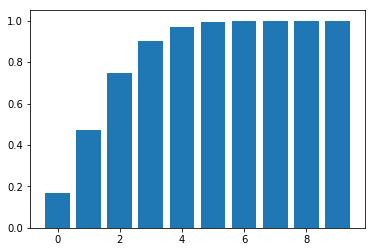

In [127]:
binom_cdf = [binom_dist.cdf(i) for i in range(10)]
plt.bar(range(10), binom_cdf)
    

In [133]:
1-binom_dist.cdf(9)

5.636767444361368e-06

(array([1.6611e+04, 3.0704e+04, 2.7097e+04, 1.5960e+04, 6.7030e+03,
        2.1720e+03, 6.2600e+02, 9.9000e+01, 2.5000e+01, 3.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

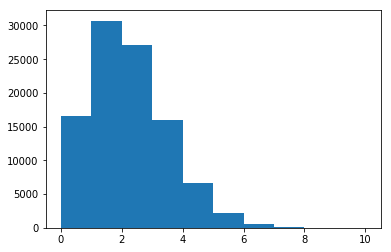

In [119]:
fig, ax = plt.subplots()
#ax.set_xlim((0, .1))
ax.hist(data)

### Your answer here: is there sufficient data to refute the null hypothesis? [Yes/No]


No. 35 people is not nearly enough to run this test.

## Experimenting With New Test Designs
If we relax alpha and beta to .05, each (opening ourselves up to a higher probability of making type I and type II errors), how much would our required sample size drop?

### Your answer here: how much would required sample size drop based on the new formulation?


## Summary

In this lab, you practiced designing an intial experiment and then refined the parameters of the experiment based on an initial sample to determine feasability.